In [1]:
# %load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

# Loading reported and synthetic data

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [4]:
# Revoking top hits frames created by the seen deer estimator
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(save_dir + "top_hits_Averoy_seen_deer.pkl")
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(save_dir + "top_hits_Sunndal_seen_deer.pkl")
top_hits_Vestnes_seen_deer = pd.read_pickle(save_dir + "top_hits_Vestnes_seen_deer.pkl")
top_hits_Laerdal_seen_deer = pd.read_pickle(save_dir + "top_hits_Laerdal_seen_deer.pkl")

In [5]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

afont = {"fontname": "Arial"}

# Figure 8 - Effect of varying the observation vector

## Find median tot_pop_ah from the top_hits frames

In [6]:
median_tot_pop_ah = []

for q in range(6):
    median = top_hits_seen_deer[q]['tot_pop_ah'].median()
    median_tot_pop_ah.append(median)
print("median_tot_pop_ah = ", median_tot_pop_ah)

median_tot_pop_ah =  [1022.0, 2317.0, 1411.0, 1871.5, 2020.0, 1251.5]


## Plot the distribution of predicted median tot_pop_ah for 40 synthetic observation records

In [7]:
# Numbers come from running in parallel 4 identical versions of rss_seen_deer_shuffle 10 times each

tot_pop_ah_20 = np.array([[1331. , 2565. , 1520.5, 2209.5, 2260. , 1454.5],
       [1014.5, 2444. , 1505. , 1540. , 1565. , 1306. ],
       [1102. , 2881. , 1406. , 1791.5, 2146. , 1376.5],
       [1245. , 2328.5, 2518.5, 1763. , 2319.5, 1521.5],
       [1251.5, 2678. , 1467. , 1813.5, 2291. , 1695.5],
       [ 965. , 2300. , 1370.5, 1761.5, 2398.5, 1803. ],
       [ 990. , 2239.5, 1794.5, 1589. , 1987.5, 1410.5],
       [1094.5, 2414. , 1394. , 1794.5, 1820.5, 1590.5],
       [1100.5, 2054.5, 1429.5, 1607. , 2070.5, 1383.5],
       [1145. , 2342. , 1542.5, 1620.5, 1884. , 1204. ],
       [1022. , 2505. , 1445. , 2221.5, 1791.5, 1560.5],
       [1039.5, 2118.5, 1513. , 1592. , 2240.5, 1483. ],
       [1027. , 2237. , 1264.5, 1630.5, 1804.5, 1363.5],
       [1129.5, 2214.5, 1323.5, 2185. , 1850. , 1686. ],
       [1013. , 2242.5, 1521. , 1680. , 2061.5, 1843. ],
       [1013. , 2660. , 2496. , 1900.5, 2089.5, 1460. ],
       [1020. , 2298.5, 1574. , 1823.5, 2465. , 1306. ],
       [1099.5, 1988. , 1490. , 1584.5, 2264. , 1395. ],
       [1032. , 2200.5, 2135.5, 1942. , 2185. , 1912. ],
       [1051.5, 2103. , 1534. , 2272.5, 1620.5, 1970. ],
       [1000. , 2509.5, 1494. , 2086. , 1678.5, 1255.5],
       [1198.5, 2393.5, 1632.5, 1805.5, 2250.5, 1850. ],
       [ 983. , 2715.5, 1686. , 1966.5, 1749.5, 1253.5],
       [ 955. , 2303. , 1413.5, 1754.5, 2277.5, 1539. ],
       [1074. , 2444. , 1539. , 1930.5, 1691.5, 1651.5],
       [1021.5, 2423. , 1283. , 2604. , 2035.5, 1554.5],
       [1014. , 2484.5, 1497.5, 1498.5, 1721. , 1381.5],
       [ 999. , 2985.5, 1589.5, 1644. , 1832. , 1291.5],
       [1078. , 2215. , 1503.5, 1797. , 2641. , 1322. ],
       [1059.5, 2252. , 1386.5, 1806. , 2324.5, 1535. ],
       [1126.5, 2417. , 1422. , 1636.5, 2069.5, 1938.5],
       [1066.5, 2132. , 1591.5, 1822. , 1727. , 1546.5],
       [1129.5, 3115. , 1395. , 1860. , 2694. , 1538. ],
       [ 997. , 2187. , 1365.5, 1904.5, 1739.5, 2144.5],
       [1088.5, 2230. , 1452. , 1645. , 2296. , 1645. ],
       [ 961.5, 2824.5, 1646.5, 1612.5, 1653. , 1534.5],
       [1135.5, 2441.5, 1794.5, 2129. , 2331.5, 1268.5],
       [1180. , 2339.5, 1366. , 2491. , 1874. , 1476. ],
       [1018.5, 2245.5, 1650.5, 1871.5, 2063. , 1322. ],
       [1008.5, 2402. , 1450.5, 1967. , 2057.5, 1297. ]])

CPU times: user 390 ms, sys: 46.9 ms, total: 437 ms
Wall time: 225 ms


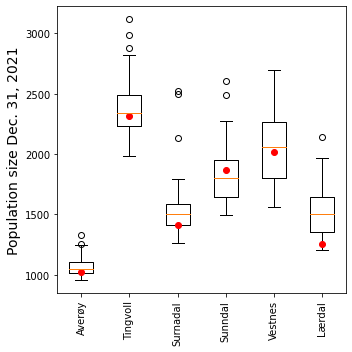

In [8]:
%%time
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
ax.boxplot(tot_pop_ah_20[:][:])
x = np.arange(1,7)
ax.plot(x, median_tot_pop_ah, 'ro')
ax.set_ylabel("Population size Dec. 31, 2021", fontsize=14)
#ax.yaxis.set_major_formatter(formatter)
ax.set_xticks(x)
ax.set_xticklabels(["Averøy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Lærdal"], rotation="vertical")
fig.tight_layout()
save_dir = "figures/"
plt.savefig(save_dir + "Figure_8.pdf", dpi=600, bbox_inches="tight")
pass;